In [262]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [263]:
data = pd.read_csv('laptop_data.csv')
# data.head()

In [264]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [265]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [266]:
df = data.copy()

In [267]:
df.shape

(1303, 11)

In [268]:
df.duplicated().sum()

29

In [269]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [270]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [272]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include=['float32','float64','int32','int64']).columns
catvars ,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [273]:
for col in df.columns:
    print(f"The unique values in  [{col}]  are:\n ", df[col].unique())
    print('\n')

The unique values in  [Company]  are:
  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


The unique values in  [TypeName]  are:
  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


The unique values in  [Inches]  are:
  [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]


The unique values in  [ScreenResolution]  are:
  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x

In [274]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [275]:
# # df['Weight'].unique()
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].str.replace('GB','')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] =df['Weight'].astype('float32')

In [276]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


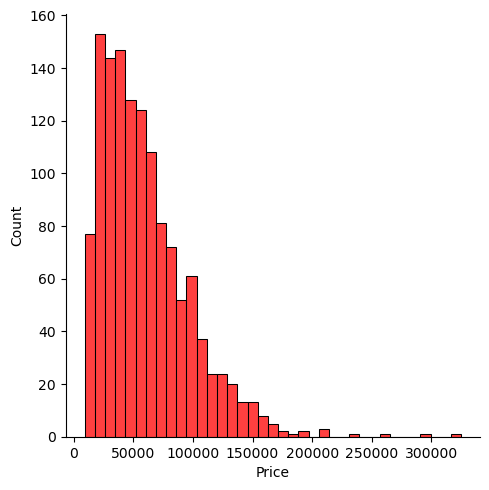

In [278]:
# sns.distplot(df['Price'],color='r')
sns.displot(df['Price'],color='r')
# left skewed on gausian surface

<Axes: xlabel='Price', ylabel='Count'>

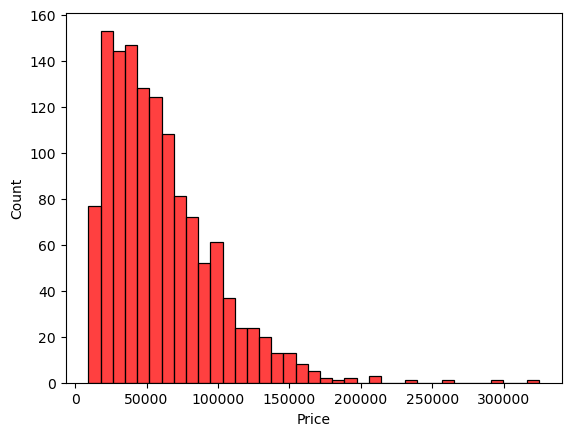

In [279]:
sns.histplot(df['Price'],color='r')

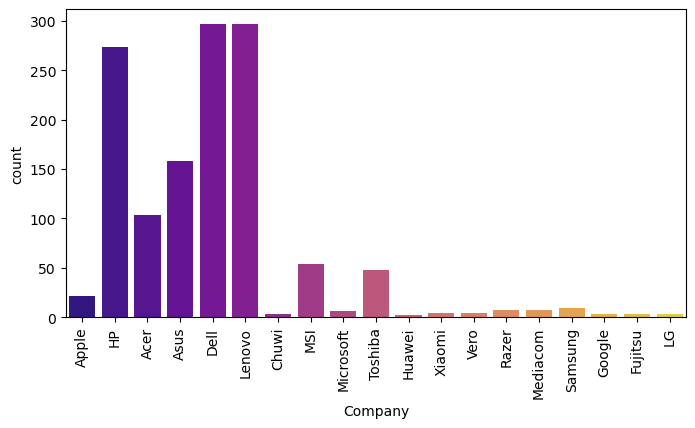

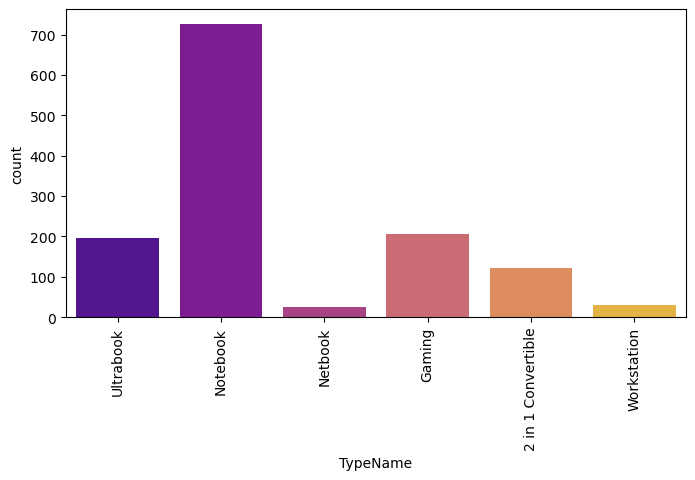

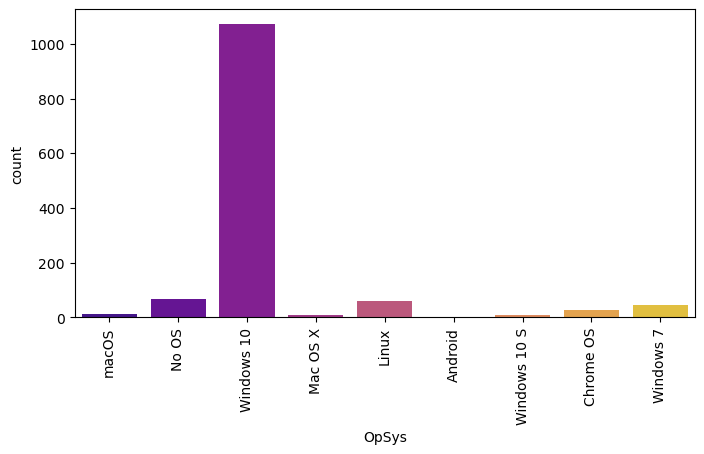

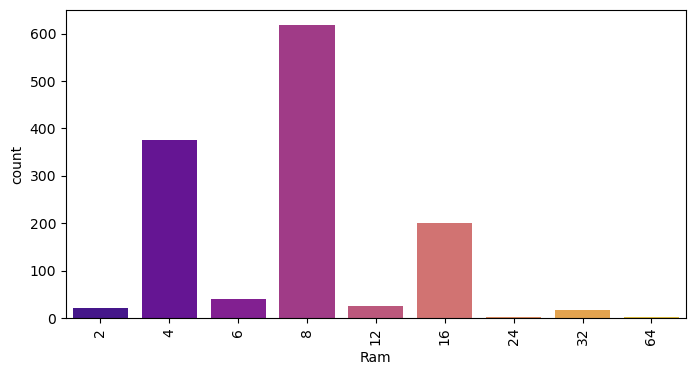

In [280]:
def drawPlot(col):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='plasma')
    plt.xticks(rotation='vertical')
    plt.show()
    
cols = ['Company', 'TypeName','OpSys','Ram']
for col in cols:
    drawPlot(col)

In [281]:
# # average price of the each laptop brand
# # this will show, the price of laptop vary as per the company
# def drawAvgPlot(col):
#     plt.figure(figsize=(8,5))
#     sns.barplot(x = df[col] , y =df['Price'])
#     plt.xticks(rotation='vertical')
#     plt.show()
# cols = df.drop(['Price'],axis =1)
# for col in cols:
#     drawAvgPlot(col)
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

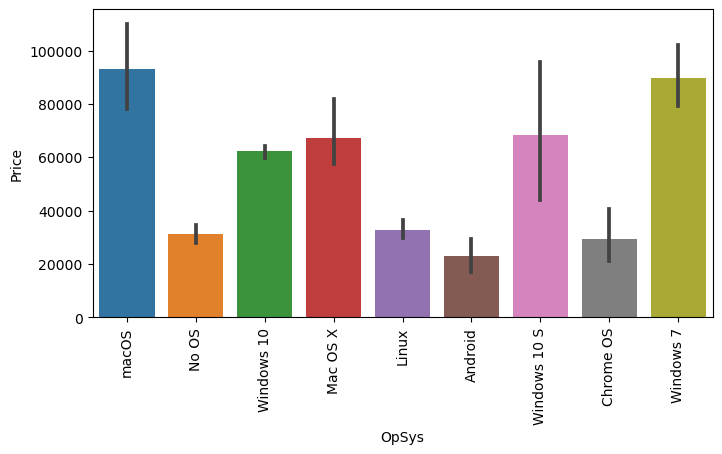

In [282]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['OpSys'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [283]:
# plt.figure(figsize=(8,4))
# sns.scatterplot(x = df['Gpu'] , y =df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

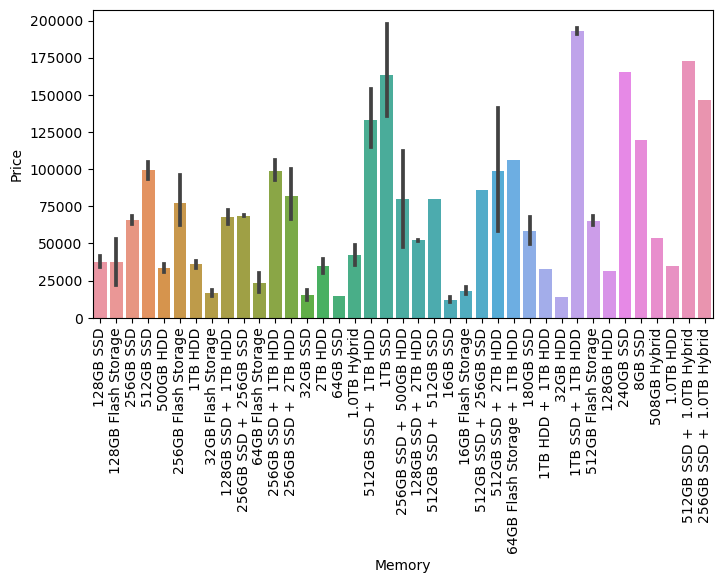

In [284]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['Memory'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

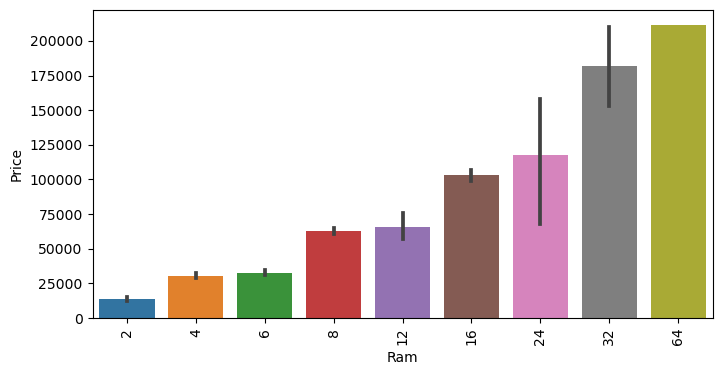

In [285]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['Ram'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [286]:
# plt.figure(figsize=(8,4))
# sns.barplot(x = df['ScreenResolution'] , y =df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

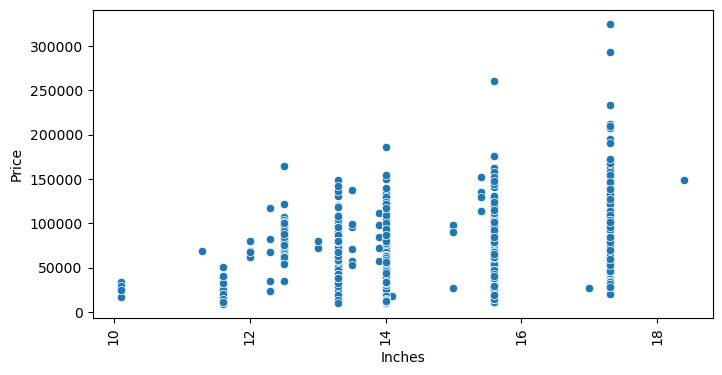

In [287]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = df['Inches'] , y =df['Price'])
# sns.barplot(x = df['Inches'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [288]:
# plt.figure(figsize=(8,4))
# sns.barplot(x = df['Cpu'] , y =df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

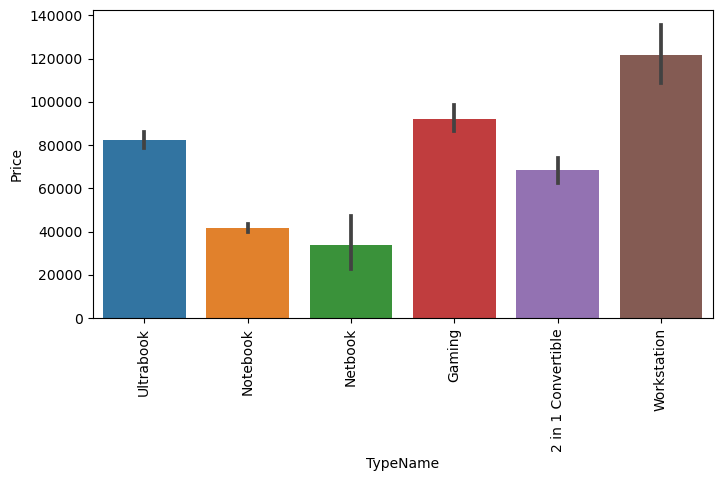

In [289]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['TypeName'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

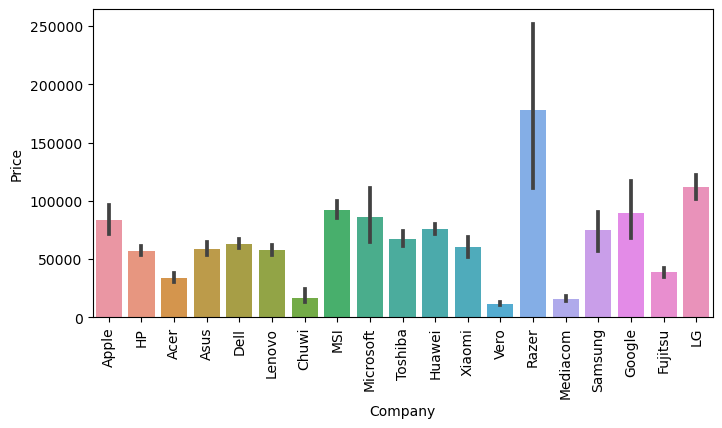

In [290]:
plt.figure(figsize=(8,4))
sns.barplot(x = df['Company'] , y =df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [291]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [292]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0  )

In [293]:
df.TouchScreen.value_counts()

0    1111
1     192
Name: TouchScreen, dtype: int64

In [294]:
# df.sample()
# df.tail()
# df.head()

<Axes: xlabel='TouchScreen', ylabel='count'>

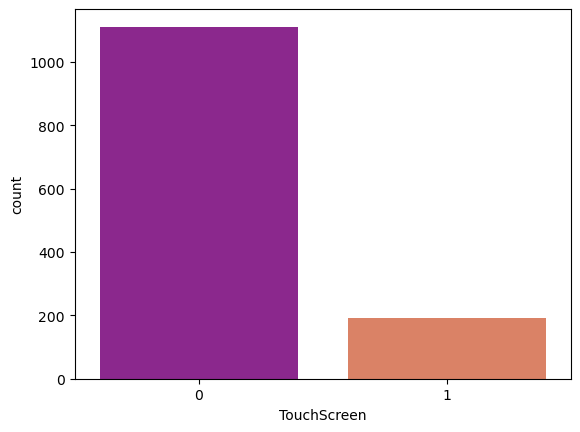

In [295]:
sns.countplot(data = df, x= df['TouchScreen'],palette='plasma')

<Axes: xlabel='TouchScreen', ylabel='Price'>

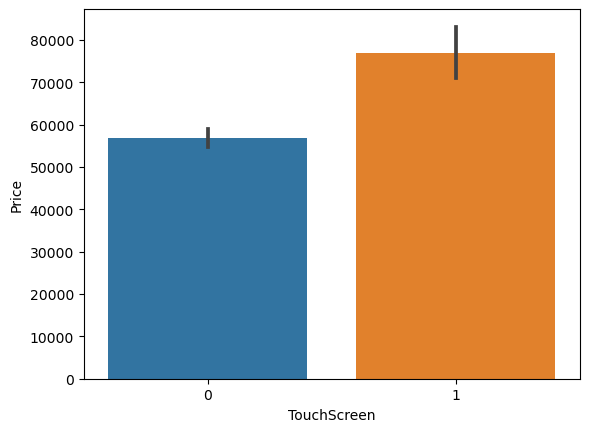

In [296]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [297]:
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if 'IPS' in element else 0  )

In [298]:
df.IPS.value_counts()

0    938
1    365
Name: IPS, dtype: int64

<Axes: xlabel='IPS', ylabel='count'>

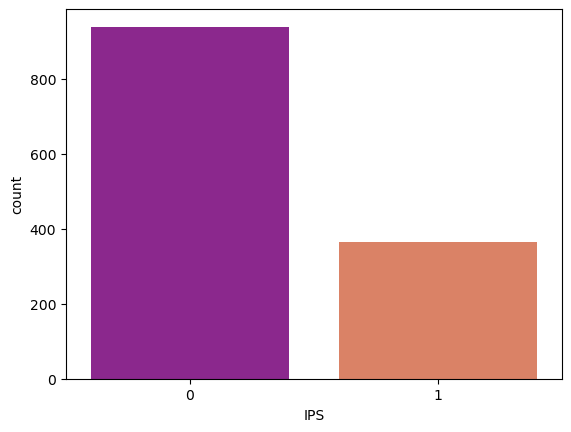

In [299]:
sns.countplot(data = df, x = df['IPS'] , palette='plasma')

<Axes: xlabel='IPS', ylabel='Price'>

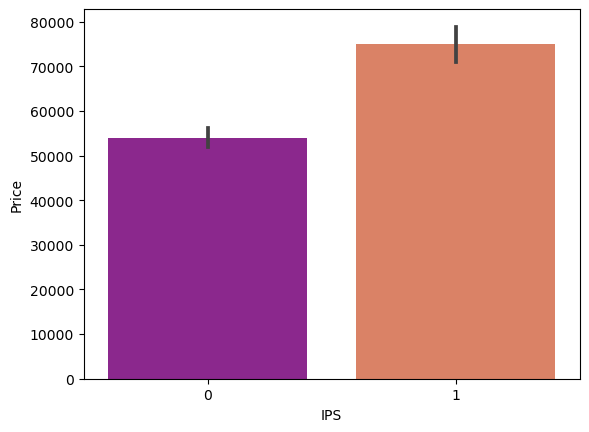

In [300]:
sns.barplot(x = df['IPS'], y=df['Price'] , palette='plasma')

In [301]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1186,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,2.09,62817.120,1,0
1287,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.920,0,0
547,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.15,24634.008,0,0
431,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,53812.800,0,1
1001,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349.920,0,1


In [302]:
splitscreen = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res']= splitscreen[0]
df['Y_res']= splitscreen[1]

In [303]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [304]:
df['X_res'].unique()

array(['IPS Panel Retina Display 2560', '1440', 'Full HD 1920',
       'IPS Panel Retina Display 2880', '1366', 'IPS Panel Full HD 1920',
       'IPS Panel Retina Display 2304',
       'IPS Panel Full HD / Touchscreen 1920',
       'Full HD / Touchscreen 1920', 'Touchscreen / Quad HD+ 3200',
       'IPS Panel Touchscreen 1920', 'Touchscreen 2256',
       'Quad HD+ / Touchscreen 3200', 'IPS Panel 1366',
       'IPS Panel 4K Ultra HD / Touchscreen 3840',
       'IPS Panel Full HD 2160', '4K Ultra HD / Touchscreen 3840',
       'Touchscreen 2560', '1600', 'IPS Panel 4K Ultra HD 3840',
       '4K Ultra HD 3840', 'Touchscreen 1366', 'IPS Panel Full HD 1366',
       'IPS Panel 2560', 'IPS Panel Full HD 2560',
       'IPS Panel Retina Display 2736', 'Touchscreen 2400', '2560',
       'IPS Panel Quad HD+ 2560', 'IPS Panel Quad HD+ 3200',
       'IPS Panel Quad HD+ / Touchscreen 3200',
       'IPS Panel Touchscreen 1366', '1920',
       'IPS Panel Touchscreen / 4K Ultra HD 3840',
       'IPS Pa

In [305]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'\d+\.?\d+').apply(lambda x: x[0])

In [306]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
841,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,163723.5792,0,1,1920,1080


In [307]:
df['X_res'] =df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [308]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\2584852893.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='plasma')


<Axes: >

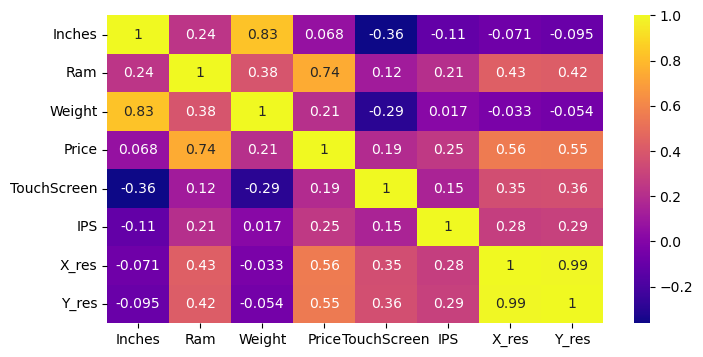

In [309]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [310]:
df.X_res.unique()

array([2560, 1440, 1920, 2880, 1366, 2304, 3200, 2256, 3840, 2160, 1600,
       2736, 2400])

In [311]:
df.corr()['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [312]:
# df['PPI'] = (((df['X_res']**2 + df['Y_res']**2))**0.5)/df['Inches'].astype('float')

In [313]:
df['PPI'] = (((df['X_res']**2 + df['Y_res']**2)**0.5)/df['Inches']).astype('float')

In [314]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [315]:
df.corr()['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [316]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS',
       'X_res', 'Y_res', 'PPI'],
      dtype='object')

In [317]:
df.drop(['Inches','X_res','Y_res','ScreenResolution'],axis =1 , inplace=True)

In [318]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [319]:
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [320]:
df['CPU_'] = df['Cpu'].apply(lambda text: " ".join(text.split()[:3]))

In [321]:
df.CPU_.value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [322]:
def processCPU(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if 'Intel' in text:
            return 'Intel Processor'
        else:
            return 'AMD processor'
        
df['CPU_'] = df['CPU_'].apply(lambda text: processCPU(text))

In [323]:
df['CPU_'].value_counts()

Intel Core i7      527
Intel Core i5      423
Intel Processor    154
Intel Core i3      136
AMD processor       63
Name: CPU_, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Intel Processor')])

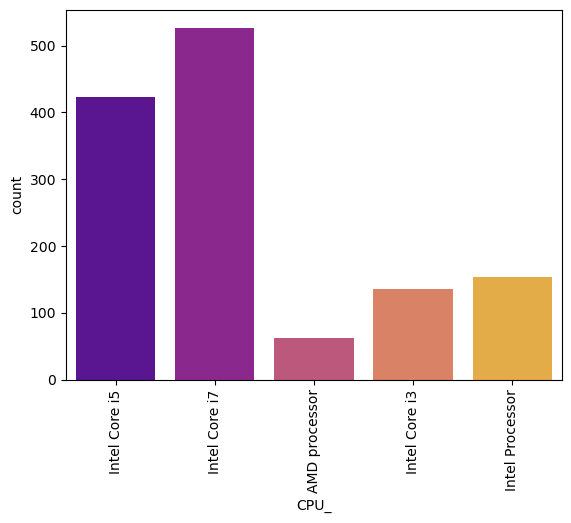

In [324]:
sns.countplot(data=df,x=df['CPU_'],palette='plasma')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Intel Processor')])

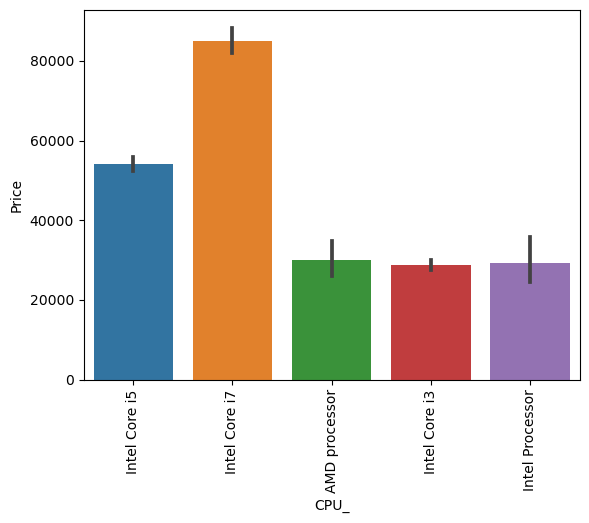

In [325]:
sns.barplot(x=df['CPU_'],y=df['Price'])
plt.xticks(rotation='vertical')

<Axes: xlabel='Ram', ylabel='count'>

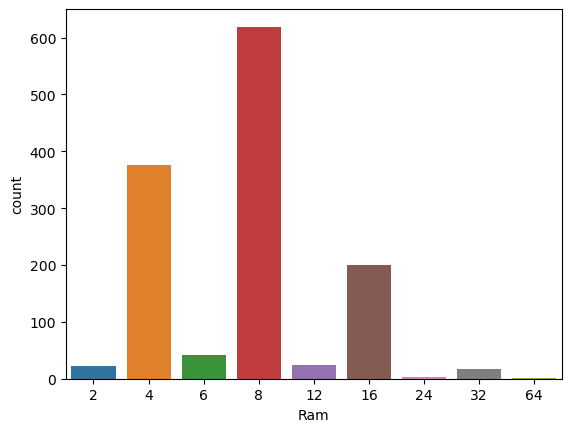

In [326]:
sns.countplot(data=df,x=df['Ram'])

<Axes: xlabel='Ram', ylabel='Price'>

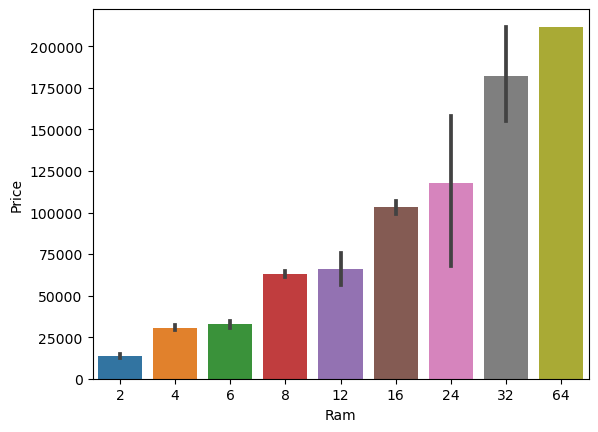

In [327]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [328]:
# df['Memory'] = df['Memory'].str.replace('TB','000')
# df['Memory'] = df['Memory'].str.replace('GB','')
# df['Memory'] = df['Memory'].str.replace('\.','', regex=True)
# splitMemory = df['Memory'].str.split('+', n=1, expand=True)

In [329]:
# df['Memory'].value_counts()
# remove the decimal points
df['Memory'] = df['Memory'].astype(str).replace('\.','',regex=True)

# remove the GB words
df['Memory'] = df['Memory'].str.replace('GB','')
# convert tb 

df['Memory'] = df['Memory'].str.replace('TB','000')

# splitMemory = df['Memory'].str.split('+' , n = 1, expand=True)

# splitMemory
# df['Memory'].value_counts()

In [330]:
df.Memory.value_counts()

256 SSD                         412
1000 HDD                        223
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
10000 Hybrid                      9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [331]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [332]:
# df.drop(['Cpu'],axis=1,inplace=True)

In [333]:
df.Memory.unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '10000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '10000 HDD', '512 SSD +  10000 Hybrid', '256 SSD +  10000 Hybrid'],
      dtype=object)

In [334]:
# df['SSD'] = df['Memory'].apply(lambda text: 1 if 'SSD' in text else 0)
# df['HDD'] = df['Memory'].apply(lambda text: 1 if 'HDD' in text else 0)
# df['Hybrid'] = df['Memory'].apply(lambda text: 1 if 'Hybrid' in text else 0)
# df['FlashStorage'] = df['Memory'].apply(lambda text: 1 if 'Flash Storage' in text else 0)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   TouchScreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  PPI          1303 non-null   float64
 12  CPU_         1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(7)
memory usage: 122.3+ KB


In [336]:
# df.drop(['SDD'],axis=1,inplace=True)
# df.SSD.value_counts()
df.Memory.value_counts()

256 SSD                         412
1000 HDD                        223
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
10000 Hybrid                      9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [337]:
df.Memory.unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '10000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '10000 HDD', '512 SSD +  10000 Hybrid', '256 SSD +  10000 Hybrid'],
      dtype=object)

### Calculate the SSD Part.

In [338]:
df['First'] = df['Memory']
df['First_SSD'] = df['First'].apply(lambda text: text if 'SSD' in text else 0)
df['First_SSD'].value_counts()

0                          460
256 SSD                    412
512 SSD                    118
128 SSD +  1000 HDD         94
128 SSD                     76
256 SSD +  1000 HDD         73
512 SSD +  1000 HDD         14
1000 SSD                    14
256 SSD +  2000 HDD         10
32 SSD                       6
180 SSD                      5
16 SSD                       3
512 SSD +  2000 HDD          3
1000 SSD +  1000 HDD         2
256 SSD +  500 HDD           2
128 SSD +  2000 HDD          2
256 SSD +  256 SSD           2
512 SSD +  512 SSD           1
512 SSD +  256 SSD           1
64 SSD                       1
240 SSD                      1
8 SSD                        1
512 SSD +  10000 Hybrid      1
256 SSD +  10000 Hybrid      1
Name: First_SSD, dtype: int64

In [339]:
first_parts = []
for i in df['First_SSD']:
    first_part = str(i).split(' ')[0]
    first_parts.append(first_part)

df['First_SSD_'] = first_parts

In [340]:
# df.drop(['SSD'], axis=1, inplace=True)
df.rename(columns={'First_SSD_': 'SSD'}, inplace=True)
df['SSD'] = df['SSD'].astype('int')

In [341]:
# df.drop(['Cpu','First_SSD'],axis=1,inplace=True)

In [342]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_,First,First_SSD,SSD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,128 SSD,128
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,256 SSD,256
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,512 SSD,512
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,256 SSD,256


In [343]:
df.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'PPI', 'CPU_', 'First', 'First_SSD',
       'SSD'],
      dtype='object')

In [344]:
# df.drop(['Cpu','HDD',''])

###  Calculating HDD part

In [345]:
df['F_HDD'] = df['Memory']
df['F_HDD'] = df['F_HDD'].apply(lambda text: text if 'HDD' in text else 0)
# df['F_HDD'].value_counts()

In [346]:
# df['F_HDD'].unique()

In [347]:
pattern = r'(\d+) HDD'

# Extract numerical parts and convert to integers
df['HDD'] = df['F_HDD'].str.extract(pattern, expand=False)


In [348]:
# df.isna().sum()
df.fillna(0,inplace = True)

In [349]:

# df.drop(['F_HDD'],axis=1, inplace = True)
df['HDD'] = df['HDD'].astype('int')

### Calculating Hybrid

In [350]:
df['Hyb'] = df['Memory']
df['Hyb'] = df['Hyb'].apply(lambda text: text if 'Hybrid' in text else 0)

In [351]:
# df['Hyb'].value_counts()
pattern = r'(\d+) Hybrid'

# Extract numerical parts and convert to integers
df['Hybrid'] = df['Hyb'].str.extract(pattern, expand=False)


In [352]:
df['Hybrid'].fillna(0,inplace=True)
df['Hybrid'] = df['Hybrid'].astype('int')

### Calculating Flash Strorage

In [353]:
df['Hyb_'] = df['Memory']
df['Hyb_'] = df['Hyb_'].apply(lambda text: text if 'Flash Storage' in text else 0)

In [354]:
df['Hyb_'].value_counts()

0                               1228
32 Flash Storage                  38
64 Flash Storage                  15
256 Flash Storage                  8
16 Flash Storage                   7
128 Flash Storage                  4
512 Flash Storage                  2
64 Flash Storage +  1000 HDD       1
Name: Hyb_, dtype: int64

In [355]:

pattern = r'(\d+) Flash Storage'

# Extract numerical parts and convert to integers
df['FlashStorage'] = df['Hyb_'].str.extract(pattern, expand=False)

In [356]:
df['FlashStorage'].unique()

array([nan, '128', '256', '32', '64', '16', '512'], dtype=object)

In [357]:
df['FlashStorage'].fillna(0,inplace=True)

In [358]:
# df.drop(['Hyb_'],axis=1,inplace=True)
# df.rename(columns={'CPU_': 'CPU'}, inplace=True)
# df['FlashStorage'] = df['FlashStorage'].astype('int')
# df.drop(['Memory'],axis=1,inplace=True)

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,...,CPU_,First,First_SSD,SSD,F_HDD,HDD,Hyb,Hybrid,Hyb_,FlashStorage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,Intel Core i5,128 SSD,128 SSD,128,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,Intel Core i5,128 Flash Storage,0,0,0,0,0,0,128 Flash Storage,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,Intel Core i5,256 SSD,256 SSD,256,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,Intel Core i7,512 SSD,512 SSD,512,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,Intel Core i5,256 SSD,256 SSD,256,0,0,0,0,0,0


In [359]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,...,CPU_,First,First_SSD,SSD,F_HDD,HDD,Hyb,Hybrid,Hyb_,FlashStorage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,Intel Core i5,128 SSD,128 SSD,128,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,Intel Core i5,128 Flash Storage,0,0,0,0,0,0,128 Flash Storage,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,Intel Core i5,256 SSD,256 SSD,256,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,Intel Core i7,512 SSD,512 SSD,512,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,Intel Core i5,256 SSD,256 SSD,256,0,0,0,0,0,0


In [360]:
df.drop(['Cpu','Memory','First','F_HDD','Hyb_','Hyb'],axis=1,inplace=True)

In [361]:
df.drop(['First_SSD'],axis=1,inplace=True)

In [362]:
# df.head()

In [363]:
# df.rename(columns={'CPU_': 'CPU'}, inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_,SSD,HDD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,0,0


In [364]:
df.corr()['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
PPI            0.473487
SSD            0.676202
HDD           -0.092979
Hybrid         0.008747
Name: Price, dtype: float64

In [365]:
df.drop(['Hybrid','FlashStorage'],axis =1,inplace=True)
# because these two are not making very less contribution

In [366]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [367]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [368]:
def processCPU(text):
    return text.split(' ')[0]
        
df['Gpu'] = df['Gpu'].apply(lambda text: processCPU(text))

In [369]:
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

<Axes: xlabel='Gpu', ylabel='count'>

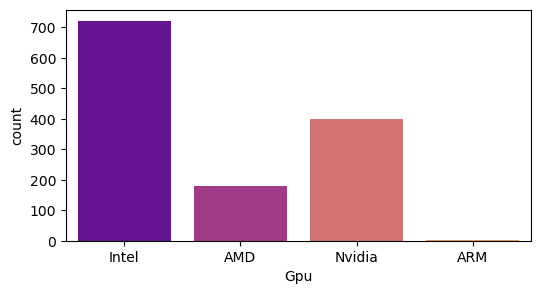

In [370]:
plt.figure(figsize=(6,3))
sns.countplot(data = df, x= df['Gpu'], palette='plasma')

<Axes: xlabel='Gpu', ylabel='Price'>

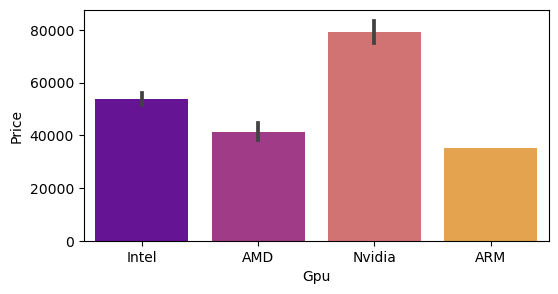

In [371]:
plt.figure(figsize=(6,3))
sns.barplot(x= df['Gpu'],y=df['Price'], palette='plasma' , estimator=np.mean)

In [372]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [373]:
def processOS(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return "Windows"
    else:
        if  text == 'macOS' or text == 'Mac OS X' or text == 'Mac':
            return "macOS"
        else:
            if text == "Linux":
                return "Linux"
            else:
                return "other"
        
df['OpSys'] = df['OpSys'].apply(lambda text: processCPU(text))

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No'),
  Text(2, 0, 'Windows'),
  Text(3, 0, 'Mac'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Chrome')])

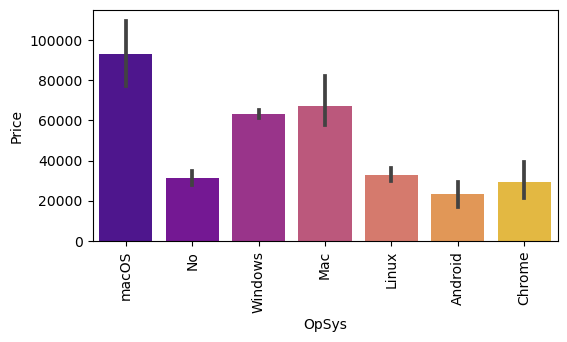

In [374]:
plt.figure(figsize=(6,3))
sns.barplot(x= df['OpSys'],y=df['Price'], palette='plasma' , estimator=np.mean)
plt.xticks(rotation='vertical')

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\3682557169.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

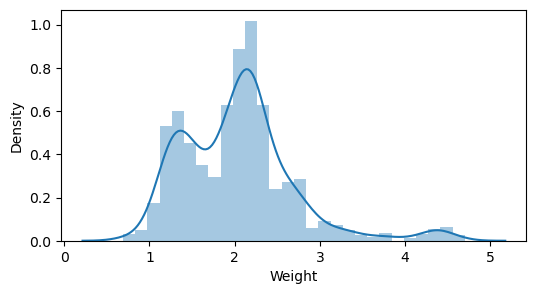

In [375]:
plt.figure(figsize=(6,3))
sns.distplot(df['Weight'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\1699775772.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

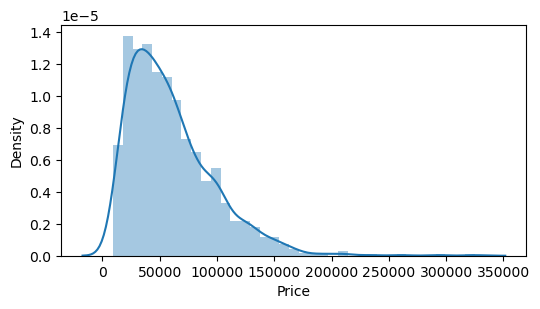

In [376]:
plt.figure(figsize=(6,3))
sns.distplot(df['Price'])

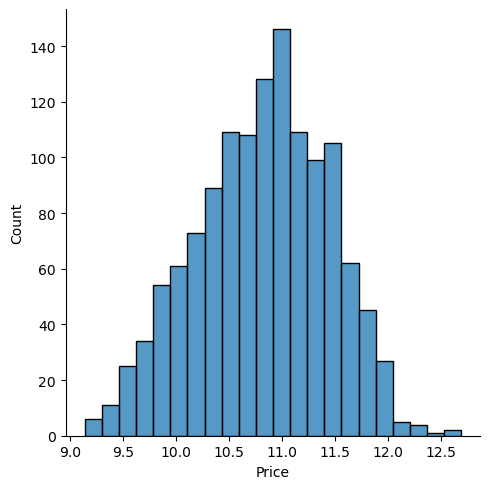

In [377]:
sns.displot(np.log(df['Price']))

In [378]:
df.corr()['Price']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
PPI            0.473487
SSD            0.676202
HDD           -0.092979
Name: Price, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_11872\475964716.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='plasma')


<Axes: >

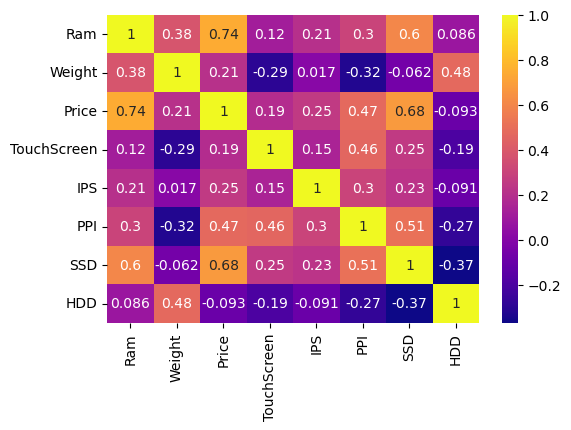

In [379]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap='plasma')


In [380]:
df1 = df.copy()

In [381]:
df1.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_,SSD,HDD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,No,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [382]:
df.OpSys.isna().value_counts()

False    1303
Name: OpSys, dtype: int64

In [383]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [384]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [385]:
X = df1.drop(columns=['Price'])
y = np.log(df1['Price'])

In [386]:
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size=0.15, random_state=42)
x_train.shape ,y_test.shape

((1107, 12), (196,))

In [387]:
# x_train
x_test

,Company,TypeName,Ram,Gpu,OpSys,Weight,TouchScreen,IPS,PPI,CPU_,SSD,HDD
479,Toshiba,Notebook,8,Intel,Windows,1.05,0,1,165.632118,Intel Core i5,256,0
1022,HP,Notebook,8,Intel,Windows,1.11,0,1,165.632118,Intel Core i5,256,0
298,Lenovo,Notebook,6,AMD,Windows,2.40,0,0,141.211998,AMD processor,0,1000
1265,Lenovo,Notebook,8,Nvidia,Windows,2.60,0,1,141.211998,Intel Core i7,0,1000
774,HP,Ultrabook,4,Intel,Windows,1.26,0,0,125.367428,Intel Core i5,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1089,Acer,Notebook,4,AMD,Windows,2.40,0,0,100.454670,AMD processor,0,500
1135,Lenovo,Notebook,16,AMD,Windows,2.50,0,0,141.211998,Intel Core i7,0,0
168,Acer,Notebook,8,Nvidia,Windows,3.00,0,1,127.335675,Intel Core i5,256,0
485,Lenovo,Notebook,8,Intel,Windows,1.75,0,1,157.350512,Intel Core i5,256,0


In [388]:
mapper = {i:value for i, value in enumerate(x_train)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'Gpu',
 4: 'OpSys',
 5: 'Weight',
 6: 'TouchScreen',
 7: 'IPS',
 8: 'PPI',
 9: 'CPU_',
 10: 'SSD',
 11: 'HDD'}

In [389]:
model_comparison = {}

# Linear Regression
Linear Regression is a linear approach to modeling the relationship between a dependent variable (

y) and one or more independent variables (
features ). It assumes a linear relationship and aims to find the coefficients (
w paramaters) that minimize the sum of squared differences between the observed and predicted values.

In [390]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f"R2 Score is : {r2_score(y_test, y_pred)}")
print(f"MAE is : {mean_absolute_error(y_test,y_pred)}")

# model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score is : 0.837772066875014
MAE is : 0.18932143454726236


In [391]:
# predicted price = actual price - np.exp(mae)
mae = np.exp(0.18932143454726236)
actual_price = df.Price.iloc[:1]

print(f"Actual price is: {actual_price}")
print(f"Predicted Price is: {actual_price-np.exp(0.18932143454726236)}")

Actual price is: 0    71378.6832
Name: Price, dtype: float64
Predicted Price is: 0    71377.474771
Name: Price, dtype: float64


# Ridge Regression
Ridge Regression is an extension of Linear Regression that includes a regularization term in the cost function. The regularization term is the sum of the squared coefficients multiplied by a regularization parameter (
λ). The goal of Ridge Regression is to prevent overfitting by penalizing large coefficients, leading to a more stable model.

In [392]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = Ridge(alpha=0.09)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f"R2 Score is : {r2_score(y_test, y_pred)}")
print(f"MAE is : {mean_absolute_error(y_test,y_pred)}")

# model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score is : 0.837868012148963
MAE is : 0.18924580602332125


# Lasso Regression
Lasso Regression, like Ridge Regression, is an extension of Linear Regression with a regularization term. However, Lasso uses the sum of the absolute values of the coefficients multiplied by a regularization parameter (λ). Lasso has the additional property of performing automatic feature selection by driving some coefficients exactly to zero. This results in a sparse model with fewer features.

In [393]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = Lasso(alpha=0.00001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f"R2 Score is : {r2_score(y_test, y_pred)}")
print(f"MAE is : {mean_absolute_error(y_test,y_pred)}")

# model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score is : 0.8377906751674866
MAE is : 0.1893179947472516


# Decision Tree Regressor:
A Decision Tree Regressor is a supervised machine learning algorithm that builds a tree-like structure to model the relationship between input features and a continuous target variable. The tree is constructed by recursively splitting the data based on feature conditions, with each leaf node representing a prediction for the target variable. The algorithm aims to minimize the variance of predictions within each leaf node, making it well-suited for capturing complex non-linear relationships in the data. Decision trees are interpretable and can be visualized, making them valuable for understanding the decision-making process of the model.

In [394]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f"R2 Score is : {r2_score(y_test, y_pred)}")
print(f"MAE is : {mean_absolute_error(y_test,y_pred)}")

# model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score is : 0.8179218306968006
MAE is : 0.18755615315725527


# Random Forest:
```Random Forest is an ensemble learning method that builds a collection of decision trees during training and outputs the average (for regression tasks) or majority vote (for classification tasks) of the individual trees as the final prediction. It operates by creating multiple decision trees with different subsets of the training data and features. This ensemble approach helps to reduce overfitting, improve generalization, and enhance the model's robustness. Additionally, Random Forest provides a measure of feature importance based on how often and how much a feature is used across the trees. It is a powerful and widely used algorithm for both regression and classification tasks.```

## RandomForestRegressor Parameters:

-  The number of decision trees in the forest. In this case, n_estimators is set to 200, meaning the Random Forest will consist of 200 decision trees.

- random_state: A seed for the random number generator. Setting a specific seed ensures reproducibility. In this case, random_state is set to 3.

- max_depth: The maximum depth of each decision tree in the forest. A deeper tree can capture more complex relationships but may lead to overfitting. Setting max_depth to 20 restricts the maximum depth of each tree.

- max_features: The maximum number of features considered for splitting a node. It helps control the diversity among the trees in the forest. Setting max_features to 0.75 means that, for each tree, only 75% of the features are considered when making a split.

- max_samples: The maximum number or proportion of samples used to train each individual tree. Setting max_samples to 0.5 means that each tree is trained on a random half of the training data.


In [395]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,
                             random_state=3,
                             max_depth=20,
                             max_features=0.75,
                             max_samples=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print(f"R2 Score is : {r2_score(y_test, y_pred)}")
print(f"MAE is : {mean_absolute_error(y_test,y_pred)}")

# model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score is : 0.8692261974333304
MAE is : 0.16150304064480256


### HyperParamater Tuning for RandomForestRegressor


In [396]:
indexList = [0,1,3,4,9]
transformList = []

for key,value in mapper.items():
    if key in indexList:
        transformList.append(value)
transformList

['Company', 'TypeName', 'Gpu', 'OpSys', 'CPU_']

In [397]:
# pd.get_dummies & column tranformer
train = pd.get_dummies(X, columns=transformList, drop_first=True)
train.sample(5)

,Ram,Weight,TouchScreen,IPS,PPI,SSD,HDD,Company_Apple,Company_Asus,Company_Chuwi,...,OpSys_Chrome,OpSys_Linux,OpSys_Mac,OpSys_No,OpSys_Windows,OpSys_macOS,CPU__Intel Core i3,CPU__Intel Core i5,CPU__Intel Core i7,CPU__Intel Processor
31,2,1.65,0,0,111.935204,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
165,16,2.40,0,1,141.211998,256,1000,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1177,16,3.31,0,1,141.211998,512,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
995,8,1.40,0,0,276.053530,256,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1037,8,1.47,0,1,157.350512,256,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [398]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [399]:
x_train, x_test, y_train,y_test = train_test_split(train,y,
                                        test_size=0.15,random_state=2)

In [400]:
x_train.shape, x_test.shape

((1107, 43), (196, 43))

[Text(0.5015149999732309, 0.9814814814814815, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1107\nvalue = 10.821'),
 Text(0.2343045080195144, 0.9444444444444444, 'CPU__Intel Processor <= 0.5\nsquared_error = 0.191\nsamples = 370\nvalue = 10.214'),
 Text(0.14679693618652917, 0.9074074074074074, 'CPU__Intel Core i5 <= 0.5\nsquared_error = 0.127\nsamples = 259\nvalue = 10.393'),
 Text(0.10642835873254144, 0.8703703703703703, 'CPU__Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 10.243'),
 Text(0.060918328220858894, 0.8333333333333334, 'PPI <= 114.881\nsquared_error = 0.065\nsamples = 131\nvalue = 10.18'),
 Text(0.02647337162250359, 0.7962962962962963, 'CPU__Intel Core i3 <= 0.5\nsquared_error = 0.059\nsamples = 61\nvalue = 10.065'),
 Text(0.012269938650306749, 0.7592592592592593, 'Weight <= 1.665\nsquared_error = 0.047\nsamples = 18\nvalue = 9.867'),
 Text(0.011225688552408302, 0.7222222222222222, 'squared_error = 0.0\nsamples = 1\nvalue = 9.269'),
 Text(0.01331418874820

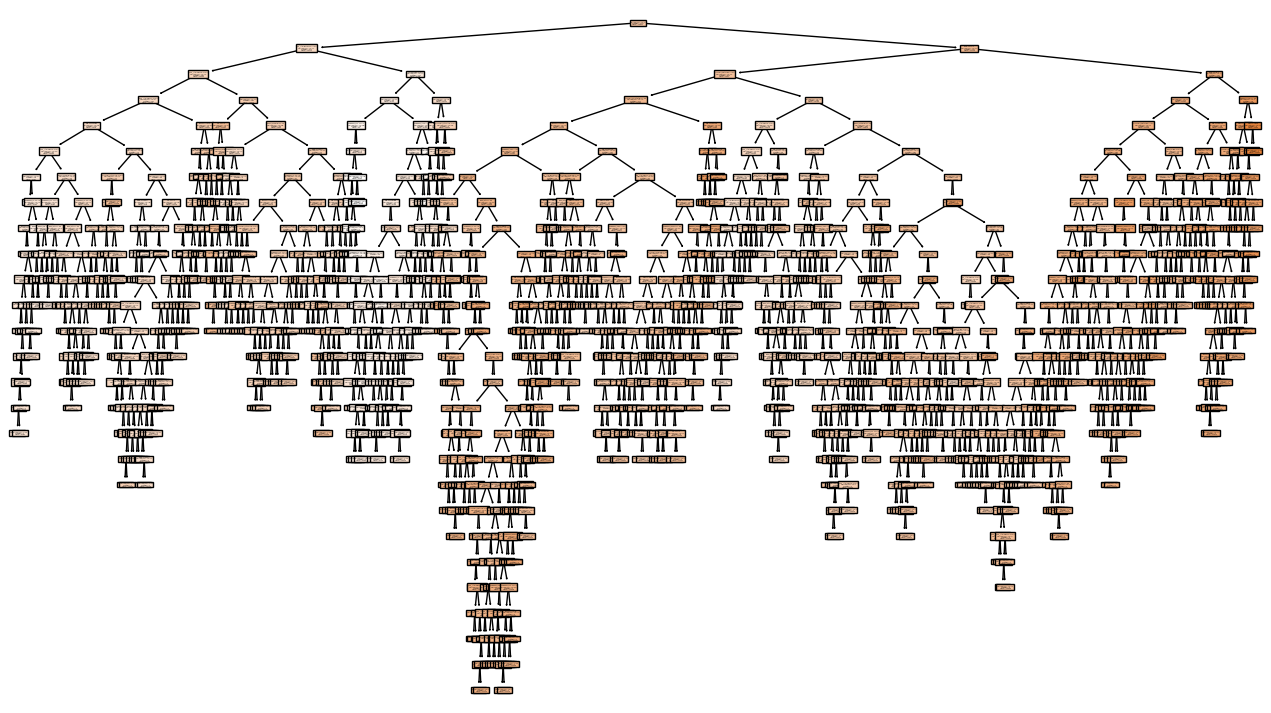

In [401]:

# see this part later by yourself
reg = DecisionTreeRegressor(random_state=0)
reg.fit(x_train,y_train)
plt.figure(figsize=(16,9))

# _, _, feature_names = reg.fit(x_train, y_train, get_feature_names_out=True)
# tree.plot_tree(reg, filled=True, feature_names=feature_names)


feature_names = list(train.columns)
tree.plot_tree(reg, filled=True, feature_names=feature_names)


In [402]:
path = reg.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = path.ccp_alphas

In [403]:
# ccp_alphas

In [404]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    reg.fit(x_train,y_train)
    alphalist.append(reg)

In [405]:
# alphalist

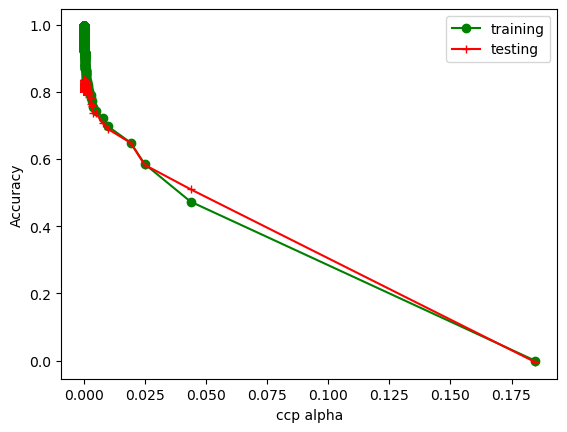

In [406]:
train_score = [reg.score(x_train,y_train) for reg in alphalist]
test_score = [reg.score(x_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha');
plt.ylabel('Accuracy');
plt.plot(ccp_alphas, train_score,marker='o',label='training',color = 'green')
plt.plot(ccp_alphas, test_score,marker='+',label='testing',color = 'red',drawstyle='default')
plt.legend()
plt.show()

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1107\nvalue = 10.821'),
 Text(0.25, 0.7, 'CPU__Intel Processor <= 0.5\nsquared_error = 0.191\nsamples = 370\nvalue = 10.214'),
 Text(0.125, 0.5, 'squared_error = 0.127\nsamples = 259\nvalue = 10.393'),
 Text(0.375, 0.5, 'squared_error = 0.094\nsamples = 111\nvalue = 9.798'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.213\nsamples = 737\nvalue = 11.125'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.157\nsamples = 540\nvalue = 10.97'),
 Text(0.5, 0.3, 'squared_error = 0.102\nsamples = 275\nvalue = 11.165'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.134\nsamples = 265\nvalue = 10.769'),
 Text(0.625, 0.1, 'squared_error = 0.069\nsamples = 56\nvalue = 10.379'),
 Text(0.875, 0.1, 'squared_error = 0.1\nsamples = 209\nvalue = 10.873'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 197\nvalue = 11.549')]

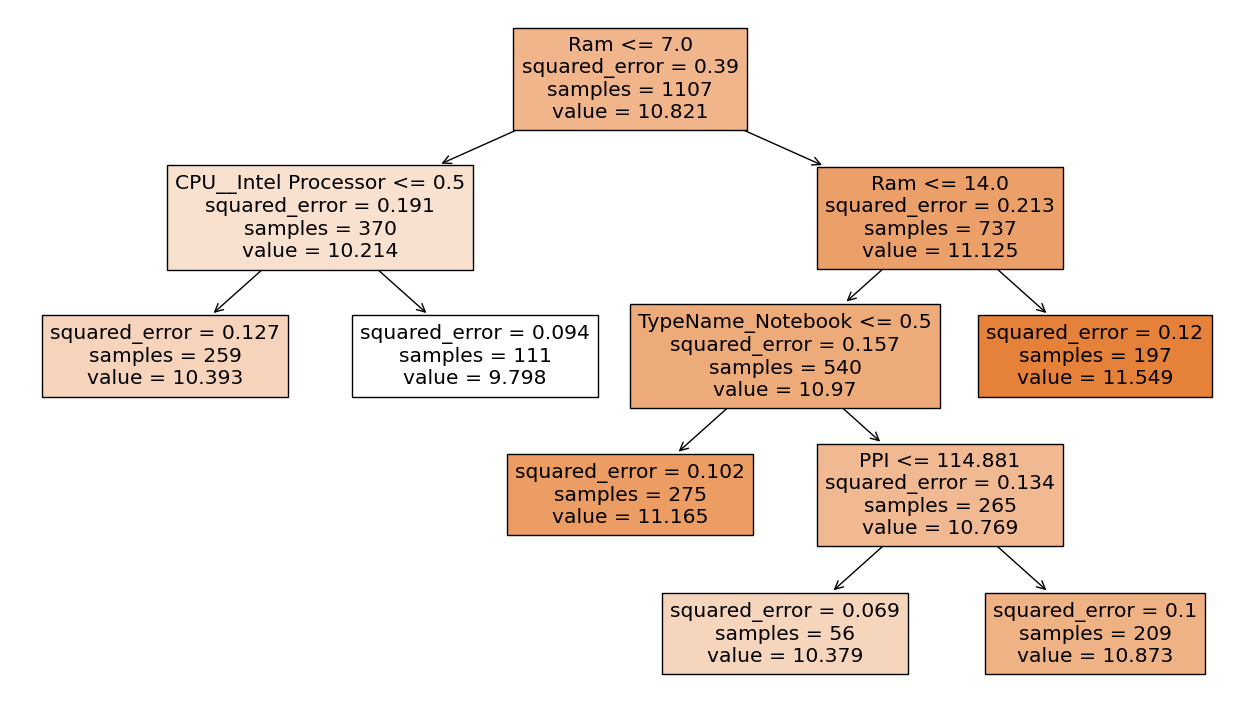

In [407]:

# see this part later by yourself
reg = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0085)
reg.fit(x_train,y_train)
plt.figure(figsize=(16,9))

# _, _, feature_names = reg.fit(x_train, y_train, get_feature_names_out=True)
# tree.plot_tree(reg, filled=True, feature_names=feature_names)


feature_names = list(train.columns)
tree.plot_tree(reg, filled=True, feature_names=feature_names)


In [408]:
params = {
    'RandomForest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':['squared_error','absolute_error'],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],

        }
        
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['squared_error','absolute_error'],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}
# np.linspace(100,1200,10)] -> randomly choosing 10 values btw 100 and 1200

In [409]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv=5,
                             n_iter = 10, scoring='neg_mean_squared_error',verbose=2)
    clf.fit(x_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   2.8s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   3.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   2.9s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   3.3s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=222; total time=   1.9s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=14, min_samples_spl

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, ma

In [410]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.076694,"(DecisionTreeRegressor(ccp_alpha=0.0025, crite..."
1,Decision Tree,-0.129889,"DecisionTreeRegressor(ccp_alpha=0.005, criteri..."


In [411]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.07669375143325025,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='absolute_error',
                        max_depth=22, max_features='sqrt', min_samples_leaf=5,
                        min_samples_split=5, n_estimators=466)},
 {'model_name': 'Decision Tree',
  'best_score': -0.12988939996496485,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, criterion='absolute_error', max_depth=22,
                        max_features='sqrt', min_samples_leaf=5,
                        min_samples_split=5)}]

In [412]:
rf =  RandomForestRegressor(ccp_alpha=0.0025, max_depth=15, max_features='log2',
                        min_samples_leaf=2, min_samples_split=5,
                        n_estimators=344)

In [413]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(metrics.r2_score(y_test,y_pred))

0.8247540806054745


In [414]:
# dc =  DecisionTreeRegressor(ccp_alpha=0.0025, max_depth=30, max_features='log2',
#                         min_samples_leaf=5)
# dc.fit(x_train,y_train)
# y_pred = dc.predict(x_test)
# print(metrics.r2_score(y_test,y_pred))

In [415]:
predicted = []
test_train = np.array(train)
for i in range(len(test_train)):
    predicted.append(rf.predict([test_train[i]]))



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWar

In [416]:
predicted[:5]

[array([11.14978972]),
 array([10.94794707]),
 array([10.666928]),
 array([11.42235835]),
 array([11.17786789])]

In [417]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [418]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_,SSD,HDD,Predicted Price
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,69549.201519
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,56837.242740
2,HP,Notebook,8,Intel,No,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,42912.910326
3,Apple,Ultrabook,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,91341.302617
4,Apple,Ultrabook,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,71529.690315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,128,0,48200.325504
1299,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,512,0,92188.731482
1300,Lenovo,Notebook,2,Intel,Windows,1.50,12201.1200,0,0,111.935204,Intel Processor,0,0,18359.388520
1301,HP,Notebook,6,AMD,Windows,2.19,40705.9200,0,0,100.454670,Intel Core i7,0,1000,36167.351218


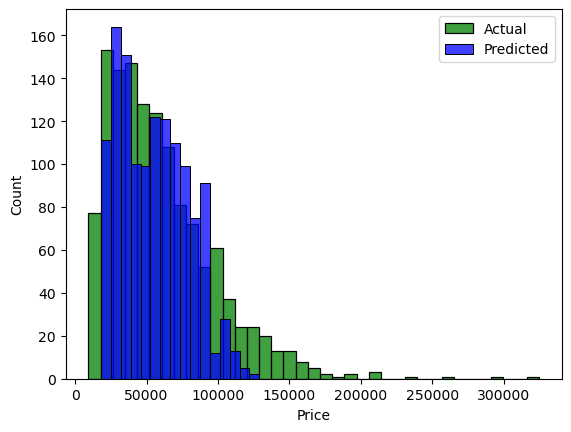

In [419]:
sns.histplot(df['Price'],color='green',label = 'Actual',kde=False)
sns.histplot(df['Predicted Price'],color='blue',label="Predicted",kde=False)
plt.legend()
plt.show()


In [420]:
import pickle
file = open('laptoppricePredictor.pkl','wb')
pickle.dump(rf,file)
file.close

<function BufferedWriter.close>

In [421]:
x_train.iloc[0]

Ram                       8.00000
Weight                    2.00000
TouchScreen               0.00000
IPS                       0.00000
PPI                     100.45467
SSD                     128.00000
HDD                       0.00000
Company_Apple             0.00000
Company_Asus              0.00000
Company_Chuwi             0.00000
Company_Dell              0.00000
Company_Fujitsu           0.00000
Company_Google            0.00000
Company_HP                0.00000
Company_Huawei            0.00000
Company_LG                0.00000
Company_Lenovo            0.00000
Company_MSI               0.00000
Company_Mediacom          0.00000
Company_Microsoft         0.00000
Company_Razer             0.00000
Company_Samsung           0.00000
Company_Toshiba           1.00000
Company_Vero              0.00000
Company_Xiaomi            0.00000
TypeName_Gaming           0.00000
TypeName_Netbook          0.00000
TypeName_Notebook         1.00000
TypeName_Ultrabook        0.00000
TypeName_Works